# Executive Summary

A Natural Language Processing model was developed using Machine Learning to evaluate two classifications of text messages. This model was then used to predict which classification (user) wrote each text message. This model was created using Python (Pandas, Scikit-Learn and Seaborn) to structure, analyze and visualize the data set.

## Model Performance

The accuracy of the model predicting which classification (user) wrote each message for the testing set was calculated at 97%. 

In [1]:
import pandas as pd
import numpy as np
import webbrowser

In [3]:
#Directing jupyter to website were that data is located and will be downloaded to folder
website='https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection'
webbrowser.open(website)

True

In [5]:
#Loading data using pandas 
messages =pd.read_csv('SMSSpamCollection',sep='\t',names=['labels','message'])

In [6]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Data exploration and visualization
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [11]:
messages['length']=messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

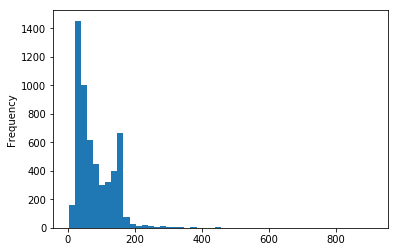

In [14]:
messages['length'].plot(bins=50,kind='hist')

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
#Determining the longest message in this data set
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9EF3C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DBDD630>], dtype=object)

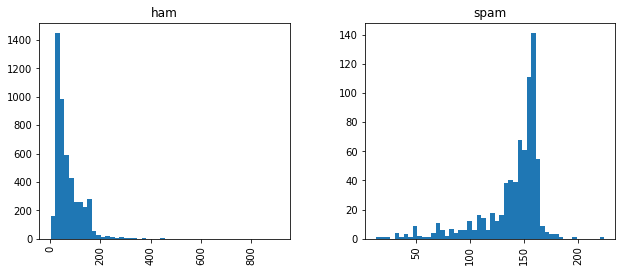

In [22]:
messages.hist(column='length',by='labels',bins=50,figsize=(10,4))

In [23]:
#Initiation of Text analyze
import string

In [38]:
#Removing punctuations
#Example
mess='Sample message! Notice it has punctuation.'

In [39]:
nopunc=[char for char in mess if char not in string.punctuation]

In [40]:
nopunc=''.join(nopunc)

In [41]:
nopunc

'Sample message Notice it has punctuation'

In [42]:
#Removing stop words
from nltk.corpus import stopwords

In [43]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [44]:
clean_mess=[word for word in nopunc.split()if word.lower() not in stopwords.words('english')]

In [45]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [46]:
#Creating function to run the loaded text
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split()if word.lower() not in stopwords.words('english')]

In [52]:
#removing punctuations and stopwords
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [53]:
#Converting string to vector
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
bow_transformer=CountVectorizer(analyzer=text_process)

In [55]:
bow_transformer.fit(messages['message'])

C:\Users\rescandon\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


CountVectorizer(analyzer=<function text_process at 0x000000000D9EE9E8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

In [56]:
message4=messages['message'][3]

In [57]:
print message4

U dun say so early hor... U c already then say...


In [58]:
bow4=bow_transformer.transform([message4])

In [59]:
print bow4

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [60]:
print bow_transformer.get_feature_names()[9554]

say


In [61]:
messages_bow=bow_transformer.transform(messages['message'])

C:\Users\rescandon\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [62]:
#Term Frequency and Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [64]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [65]:
#Training the model 
from sklearn.naive_bayes import MultinomialNB

In [67]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['labels'])

In [68]:
#Single predictor correctly determined that "ham" wrote the message
print'Predicted: ',spam_detect_model.predict(messages_tfidf)[1]
print'Expected: ',messages['labels'][1]

Predicted:  ham
Expected:  ham


In [79]:
from sklearn.metrics import classification_report

In [72]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['labels'],test_size=0.2)

In [74]:
print len(msg_train),len(msg_test)

4457 1115


In [75]:
from sklearn.pipeline import Pipeline

In [77]:
pipeline=Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                  ('tfidf',TfidfTransformer()),
                  ('classifier',MultinomialNB())])

In [78]:
pipeline.fit(msg_train,label_train)

C:\Users\rescandon\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000D9EE9E8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [80]:
predictions=pipeline.predict(msg_test)

C:\Users\rescandon\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [81]:
#Model results per test data. The model predicted the test set to a 97% accuracy.
print classification_report(predictions,label_test)

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1008
       spam       0.74      1.00      0.85       107

avg / total       0.97      0.97      0.97      1115

